In [2]:
!pip install tensorflow

In [3]:
!pip install keras

# Artificial Neural Network (ANN) Assignment.
## - On lung Cancer data set.
The effectiveness of the cancer prediction system helps people to know their cancer risk at a low cost and it also helps the people to take the appropriate decision based on their cancer risk status
## 1. Setup and Data Preparation

In [4]:
## - Import necessary libraries: pandas, matplotlib, scikit-learn, TensorFlow or keras.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## library known for its user-friendly interface for building neural networks
from keras.models import Sequential
from keras.layers import Dense


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data Set./survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [8]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
df.shape

(309, 16)

#### convert numerical -AGE to catagorical groups of age ranges i.e. 0-18 = Child, 18+ - 60 = Adult & 60+ = Old.

#### - Then encoded the catagorical indipendent variables with dummy encoder an covert it ito int. format.

In [10]:
df['AGE'] = pd.cut(df['AGE'], bins=[0, 18, 60, float('inf')], labels=['Child', 'Adult', 'Old'])

In [11]:
df = pd.get_dummies(df, columns=['GENDER','AGE'])

# List of uint8 columns to convert to numeric
uint8_columns = ['GENDER_F', 'GENDER_M', 'AGE_Child', 'AGE_Adult', 'AGE_Old']

# Convert uint8 columns to numeric
df[uint8_columns] = df[uint8_columns].astype(int)

# Display the updated DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SMOKING                309 non-null    int64 
 1   YELLOW_FINGERS         309 non-null    int64 
 2   ANXIETY                309 non-null    int64 
 3   PEER_PRESSURE          309 non-null    int64 
 4   CHRONIC DISEASE        309 non-null    int64 
 5   FATIGUE                309 non-null    int64 
 6   ALLERGY                309 non-null    int64 
 7   WHEEZING               309 non-null    int64 
 8   ALCOHOL CONSUMING      309 non-null    int64 
 9   COUGHING               309 non-null    int64 
 10  SHORTNESS OF BREATH    309 non-null    int64 
 11  SWALLOWING DIFFICULTY  309 non-null    int64 
 12  CHEST PAIN             309 non-null    int64 
 13  LUNG_CANCER            309 non-null    object
 14  GENDER_F               309 non-null    int64 
 15  GENDER_M               

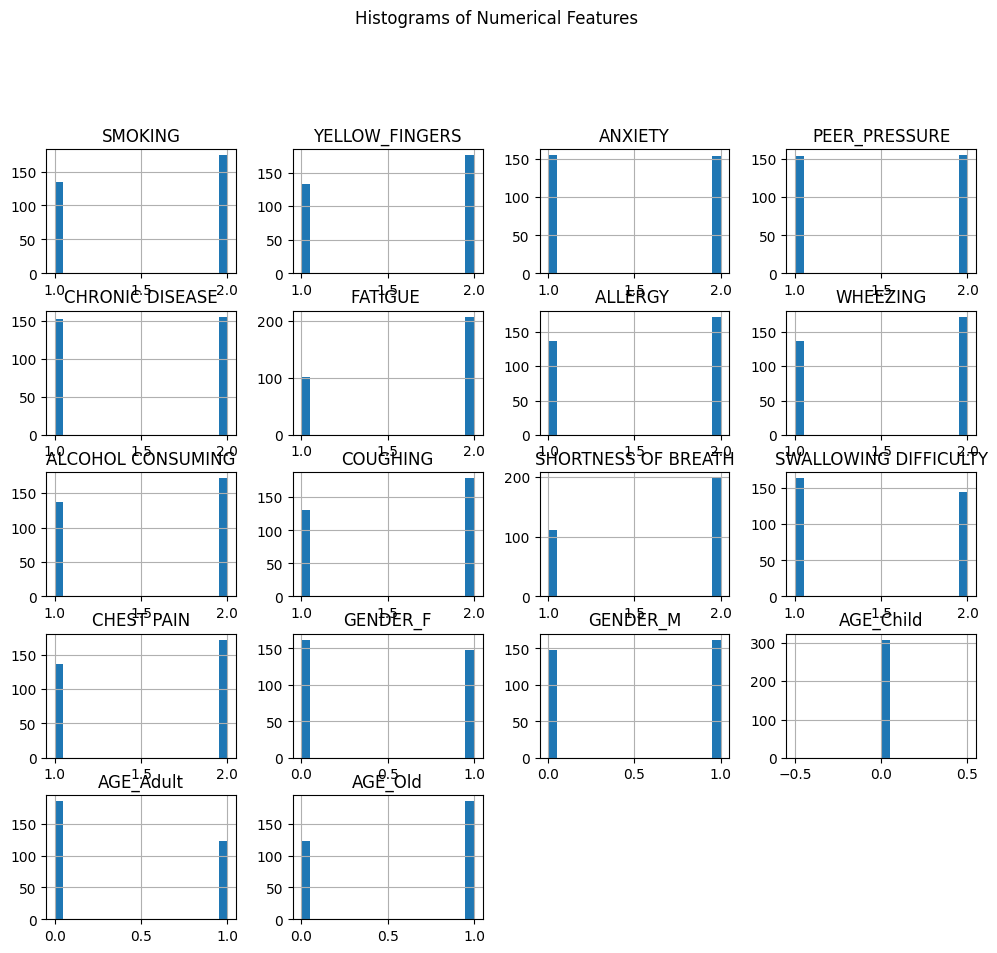

In [12]:
### Display histograms for numerical features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()


- ploting the feature datas to check the data distriution or to detect the outliers are their or not in the feature column. Here there is not outlier as most of the data is distributed in between two catagories i.e. 0 or 1 / 1 or 2.

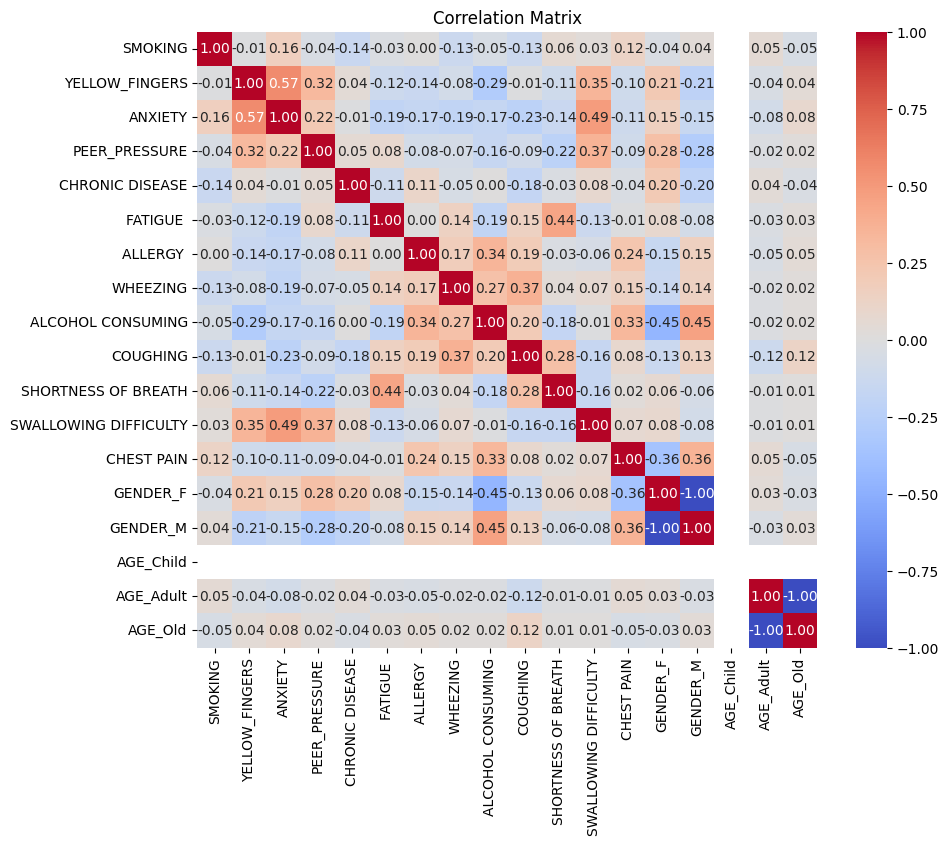

In [13]:
# Calculating the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- Hence from the above sns plot shows the co-relation between the one feature colums with other to check which features are highly co related with each other.

In [14]:
# for data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

- The dependend vaiabale (i.e. Y-Colmn.) have categorical datas, Hence to convert these categorical data to numerical data here we do data per-processing with the help of lable encoder.

In [15]:
label_encoder = preprocessing.LabelEncoder()
df.loc[:,'LUNG_CANCER'] = label_encoder.fit_transform(df.loc[:,'LUNG_CANCER'])
df.loc[:,'LUNG_CANCER'].value_counts()

<ipython-input-15-27acdf5243a4>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'LUNG_CANCER'] = label_encoder.fit_transform(df.loc[:,'LUNG_CANCER'])


1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split # lib. for spliting hte data set for training and testing purpose.

# Features (X) and target variable (y)
x = df.drop(columns=['LUNG_CANCER'])  # Features
y = df['LUNG_CANCER']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("x_train Shape:", x_train.shape)
print("x_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)


x_train Shape: (247, 18)
x_test Shape: (62, 18)
y_train Shape: (247,)
y_test Shape: (62,)


### Built a deep learning model-01 with the help of lib. keras

In [17]:
# create ANN model
model_01 = Sequential()
model_01.add(Dense(24, input_dim=18, activation='relu'))  # 1st layer

model_01.add(Dense(18, activation='relu'))  # 3rd layer
model_01.add(Dense(1, activation='sigmoid'))  # 4th layer or output layer

# Compile the model
model_01.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
history = model_01.fit(x_train, y_train, epochs=125, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/125
25/25 [==============================] - 2s 35ms/step - loss: 1.3378 - accuracy: 0.1498 - val_loss: 1.0347 - val_accuracy: 0.0323
Epoch 2/125
25/25 [==============================] - 0s 6ms/step - loss: 0.8405 - accuracy: 0.1498 - val_loss: 0.7613 - val_accuracy: 0.0484
Epoch 3/125
25/25 [==============================] - 0s 6ms/step - loss: 0.7170 - accuracy: 0.2915 - val_loss: 0.6824 - val_accuracy: 0.7419
Epoch 4/125
25/25 [==============================] - 0s 7ms/step - loss: 0.6587 - accuracy: 0.8421 - val_loss: 0.6025 - val_accuracy: 0.9516
Epoch 5/125
25/25 [==============================] - 0s 6ms/step - loss: 0.5792 - accuracy: 0.8502 - val_loss: 0.4790 - val_accuracy: 0.9677
Epoch 6/125
25/25 [==============================] - 0s 5ms/step - loss: 0.4926 - accuracy: 0.8502 - val_loss: 0.3456 - val_accuracy: 0.9677
Epoch 7/125
25/25 [==============================] - 0s 4ms/step - loss: 0.4248 - accuracy: 0.8502 - val_loss: 0.2583 - val_accuracy: 0.9677
Epoch 8/125


In [19]:
# evaluate the model
scores = model_01.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model_01.metrics_names[1], scores[1]*100))


8/8 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9676
accuracy: 96.76%


In [20]:
# evaluate the model
scores = model_01.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model_01.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 8ms/step - loss: 0.1923 - accuracy: 0.9194
accuracy: 91.94%


In [21]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

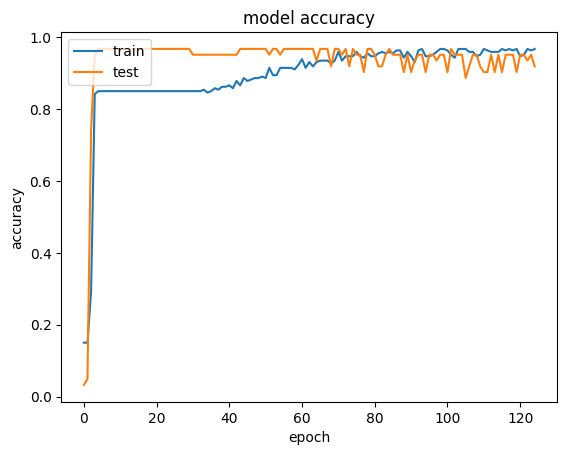

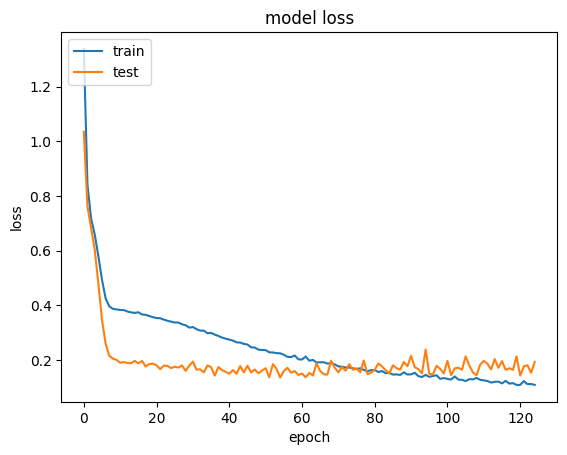

In [22]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [23]:
# fix random seed for reproducibility
seed = 7
import numpy as np  # Importing the numpy library and aliasing it as np
np.random.seed(seed)

# df is the data frame for lungs cancer.
# Load cancer dataset
dataset = df.to_numpy()  # Using the to_numpy() method to convert the DataFrame to a NumPy array

# Split into input (X) and output (Y) variables
X1 = df.drop(df.columns[13:14], axis=1).to_numpy()  # Converting the DataFrame to a NumPy array
Y1 = df.iloc[:, 13:14].to_numpy()  # Converting the DataFrame to a NumPy array


In [24]:
X1.shape, Y1.shape

((309, 18), (309, 1))

In [25]:
# create model
model_2 = Sequential()
model_2.add(Dense(24, input_dim=18,  activation='relu')) #1st layer
model_2.add(Dense(28, activation='relu')) #2st layer
model_2.add(Dense(18,  activation='relu')) #3rd layer
model_2.add(Dense(1, activation='sigmoid')) #4th layer or op layer

# Compile model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Fit the model
history1 = model_2.fit(X1, Y1, validation_split=0.25, epochs=150, batch_size=15)

Epoch 1/150
16/16 [==============================] - 1s 16ms/step - loss: 0.9738 - accuracy: 0.2294 - val_loss: 0.5980 - val_accuracy: 0.7949
Epoch 2/150
16/16 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.8745 - val_loss: 0.3898 - val_accuracy: 0.8590
Epoch 3/150
16/16 [==============================] - 0s 5ms/step - loss: 0.3526 - accuracy: 0.8788 - val_loss: 0.3654 - val_accuracy: 0.8590
Epoch 4/150
16/16 [==============================] - 0s 5ms/step - loss: 0.3322 - accuracy: 0.8788 - val_loss: 0.3664 - val_accuracy: 0.8590
Epoch 5/150
16/16 [==============================] - 0s 5ms/step - loss: 0.3292 - accuracy: 0.8788 - val_loss: 0.3634 - val_accuracy: 0.8590
Epoch 6/150
16/16 [==============================] - 0s 6ms/step - loss: 0.3270 - accuracy: 0.8788 - val_loss: 0.3621 - val_accuracy: 0.8590
Epoch 7/150
16/16 [==============================] - 0s 5ms/step - loss: 0.3232 - accuracy: 0.8788 - val_loss: 0.3587 - val_accuracy: 0.8590
Epoch 8/150


In [27]:
# evaluate the model
scores1= model_2.evaluate(X1, Y1)
print("%s: %.2f%%" % (model_2.metrics_names[1], scores1[1]*100))

10/10 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9709
accuracy: 97.09%


In [28]:
# Visualize training history

# list all data in history
history1.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

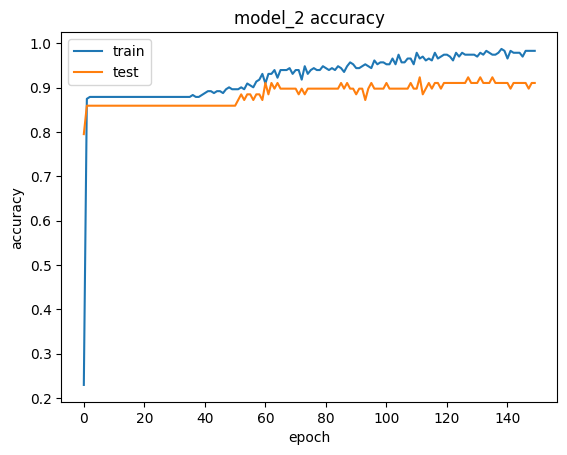

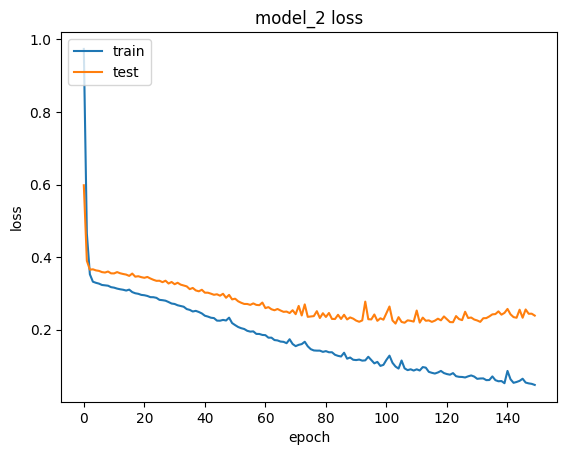

In [29]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model_2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model_2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()